<a href="https://colab.research.google.com/github/ahcamachod/1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones/blob/proyecto-final/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Lidiando con datos de muchas dimensiones

Cuando trabajamos con datos que contienen muchas dimensiones, lo recomendable es tomar dichos datos y transformarlos de modo que se ajusten a un espacio dimensional menor asegurándonos de que el espacio dimensional resultante mantenga las propiedades que mejor caracterizan a los datos originales, garantizando su dimensión intrínseca.


En este notebook, estaremos aprendiendo varias estrategias para lidiar con la alta dimensionalidad en el modelaje de aprendizaje de máquina.


El dataset empleado en el desarrollo de este proyecto es un dataset ficticio, llamado a ```aluracare.csv```, adaptado a nuestro contexto, tomando como referencia el siguiente dataset:  

*Dataset:* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# 1. Datos con muchas dimensiones

##### *https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

In [1]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/aluracare.csv')
dataset.head(3)

,id,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,examen_13,examen_14,examen_15,examen_16,examen_17,examen_18,examen_19,examen_20,examen_21,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32,examen_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN


In [2]:
dataset.shape

(569, 35)

In [3]:
dataset.diagnostico.value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

In [4]:
dataset.isna().sum()

id               0
diagnostico      0
examen_1         0
examen_2         0
examen_3         0
examen_4         0
examen_5         0
examen_6         0
examen_7         0
examen_8         0
examen_9         0
examen_10        0
examen_11        0
examen_12        0
examen_13        0
examen_14        0
examen_15        0
examen_16        0
examen_17        0
examen_18        0
examen_19        0
examen_20        0
examen_21        0
examen_22        0
examen_23        0
examen_24        0
examen_25        0
examen_26        0
examen_27        0
examen_28        0
examen_29        0
examen_30        0
examen_31        0
examen_32        0
examen_33      419
dtype: int64

In [5]:
dataset.drop(columns=['id','examen_33'], axis=1, inplace=True)
dataset.diagnostico.replace('M', 1, inplace=True)
dataset.diagnostico.replace('B', 0, inplace=True)
dataset.head()

,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,examen_13,examen_14,examen_15,examen_16,examen_17,examen_18,examen_19,examen_20,examen_21,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop(columns='diagnostico', axis=1)
y = dataset.diagnostico
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state= 42, test_size= 0.3)

In [7]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=100, n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
logistic.score(X_test,y_test)

0.9590643274853801

In [9]:
logistic = LogisticRegression(C=1, n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
logistic.score(X_test, y_test)

0.9824561403508771

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
forest.score(X_test, y_test)

0.9649122807017544

# 2. Avanzando y explorando los datos

##### *https://seaborn.pydata.org/introduction.html*
*https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

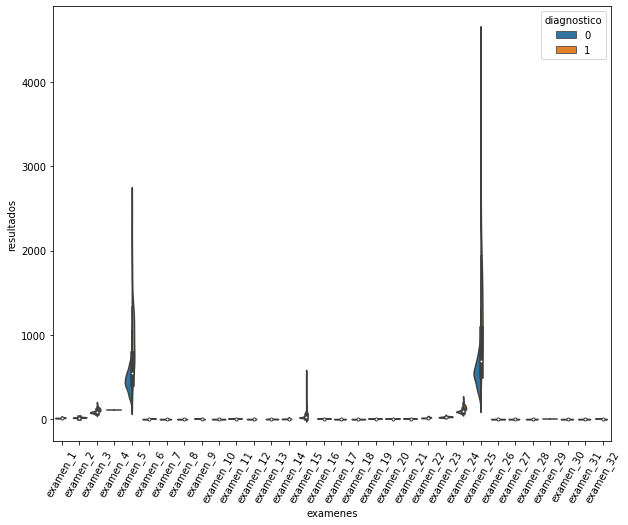

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

datos= pd.concat([y,X], axis= 1)
datos= pd.melt(datos, id_vars='diagnostico', var_name='examenes', value_name='resultados')
plt.figure(figsize=(10,8))
sns.violinplot(data= datos, x= 'examenes', y= 'resultados', hue= 'diagnostico', split=True)
plt.xticks(rotation=60)

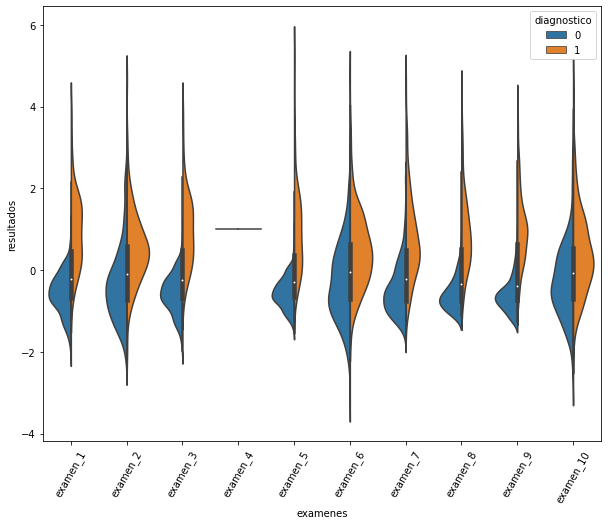

In [14]:
X1 = pd.DataFrame(X_std, columns= X.keys())

def violin(inicio, fin):
  datos= pd.concat([y,X1.iloc[:,inicio:fin]], axis= 1)
  datos= pd.melt(datos, id_vars='diagnostico', var_name='examenes', value_name='resultados')
  plt.figure(figsize=(10,8))
  sns.violinplot(data= datos, x= 'examenes', y= 'resultados', hue= 'diagnostico', split=True)
  plt.xticks(rotation=60)

violin(0,10)

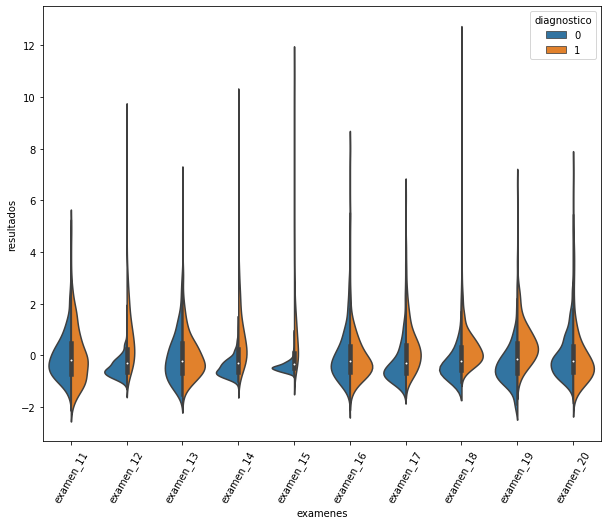

In [15]:
violin(10,20)

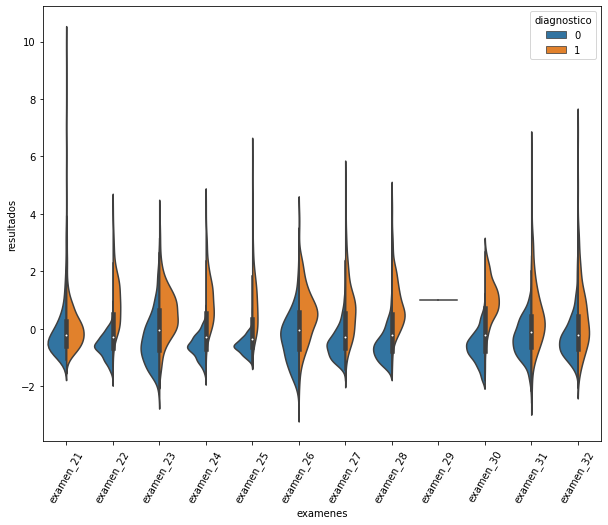

In [16]:
violin(20,32)

In [17]:
X2 = X1.drop(columns=['examen_29','examen_4'], axis=1)

In [18]:
X2.head(2)

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,examen_13,examen_14,examen_15,examen_16,examen_17,examen_18,examen_19,examen_20,examen_21,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [19]:
def puntaje(resultados):  
  X_train, X_test, y_train, y_test = train_test_split(resultados, y, random_state= 42, test_size= 0.3)
  logistic = LogisticRegression(C=1, n_jobs=-1)
  logistic.fit(X_train, y_train)
  return f'La exactitud es: {round(logistic.score(X_test, y_test)*100,2)}%'

print(puntaje(X1))

La exactitud es: 98.25%


In [20]:
print(puntaje(X2))

La exactitud es: 98.25%


# 3. Datos correlacionados

In [21]:
X2.corr()

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,examen_13,examen_14,examen_15,examen_16,examen_17,examen_18,examen_19,examen_20,examen_21,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
examen_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
examen_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
examen_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
examen_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
examen_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
examen_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
examen_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
examen_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
examen_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


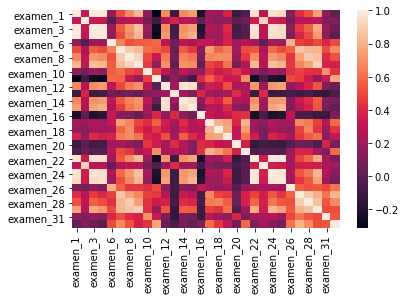

In [22]:
sns.heatmap(X2.corr())

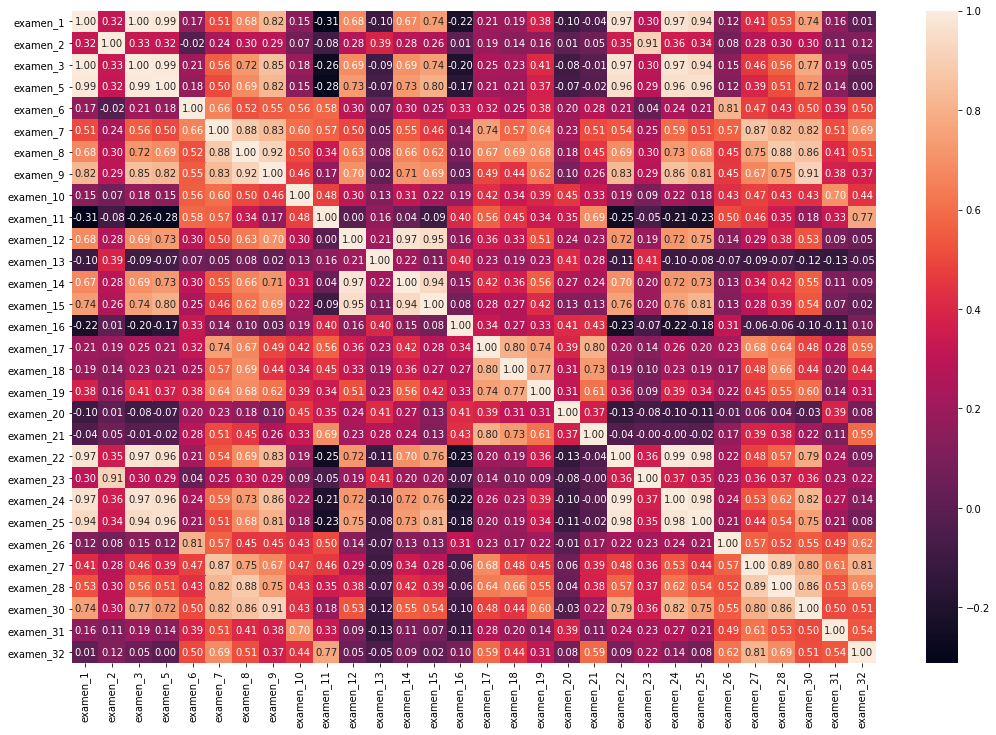

In [23]:
plt.figure(figsize=(18,12))
sns.heatmap(X2.corr(), annot=True, fmt='.2f')

In [24]:
alta_corr = X2.corr()[X2.corr()>.99]
alta_corr

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,examen_13,examen_14,examen_15,examen_16,examen_17,examen_18,examen_19,examen_20,examen_21,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
alta_corr.sum()

examen_1     1.997855
examen_2     1.000000
examen_3     1.997855
examen_5     1.000000
examen_6     1.000000
examen_7     1.000000
examen_8     1.000000
examen_9     1.000000
examen_10    1.000000
examen_11    1.000000
examen_12    1.000000
examen_13    1.000000
examen_14    1.000000
examen_15    1.000000
examen_16    1.000000
examen_17    1.000000
examen_18    1.000000
examen_19    1.000000
examen_20    1.000000
examen_21    1.000000
examen_22    1.993708
examen_23    1.000000
examen_24    1.993708
examen_25    1.000000
examen_26    1.000000
examen_27    1.000000
examen_28    1.000000
examen_30    1.000000
examen_31    1.000000
examen_32    1.000000
dtype: float64

In [26]:
X3 = X2.drop(columns=['examen_3','examen_24'], axis=1)
X3.head(3)

,examen_1,examen_2,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,examen_13,examen_14,examen_15,examen_16,examen_17,examen_18,examen_19,examen_20,examen_21,examen_22,examen_23,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [27]:
print(puntaje(X3))

La exactitud es: 98.25%


# 4. Automatizando la selección de los datos

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html*

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func= chi2, k=5)

In [29]:
X4 = X.drop(columns=['examen_3','examen_4','examen_24','examen_29'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)
kbest.fit(X_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x7f5320032710>)

In [30]:
kbest_train= kbest.transform(X_train)
kbest_test= kbest.transform(X_test)
logistic = LogisticRegression()
logistic.fit(kbest_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
print(f'La exactitud utilizando selectkbest es: {round(logistic.score(kbest_test,y_test)*100,2)}%')

La exactitud utilizando selectkbest es: 96.49%


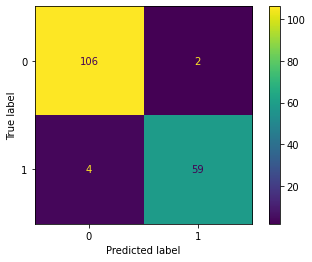

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logistic, kbest_test, y_test, values_format='d')

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def seleccion(train, test):
  model = logistic.fit(train, y_train)
  a = f'La tasa de acierto: {round(recall_score(y_test, model.predict(test))*100,2)}%'
  b = f'La precisión: {round(precision_score(y_test, model.predict(test))*100,2)}%'
  c = f'El valor f es: {round(f1_score(y_test, model.predict(test))*100,2)}%'
  d = f'La exactitud es: {round(accuracy_score(y_test, model.predict(test))*100,2)}%'
  return f'{a}, {b}, {c}, {d}.'

seleccion(kbest_train, kbest_test)

'La tasa de acierto: 93.65%, La precisión: 96.72%, El valor f es: 95.16%, La exactitud es: 96.49%.'

In [34]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfe = RFE(estimator= logistic, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [35]:
rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)

'La tasa de acierto: 96.83%, La precisión: 95.31%, El valor f es: 96.06%, La exactitud es: 97.08%.'

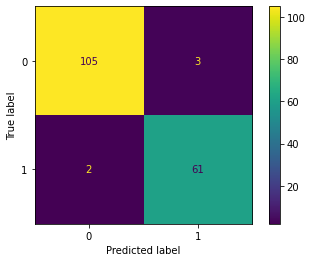

In [36]:
plot_confusion_matrix(logistic, rfe_test, y_test, values_format='d')

In [37]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

In [38]:
X3.columns[rfe.support_]

Index(['examen_12', 'examen_22', 'examen_23', 'examen_25', 'examen_30'], dtype='object')

# 5. Visualizando los datos en el plano

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html*

In [39]:
from sklearn.feature_selection import RFECV

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfecv = RFECV(estimator= logistic, cv=5, step=1, scoring='accuracy')
rfecv.fit(X_train, y_train)
rfecv_train = rfecv.transform(X_train)
rfecv_test = rfecv.transform(X_test)

seleccion(rfecv_train, rfecv_test)

'La tasa de acierto: 98.41%, La precisión: 96.88%, El valor f es: 97.64%, La exactitud es: 98.25%.'

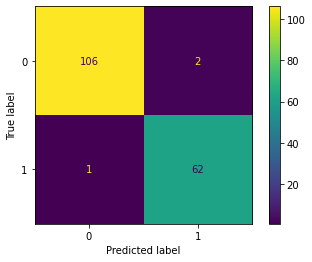

In [40]:
plot_confusion_matrix(logistic, rfecv_test, y_test, values_format='d')

In [41]:
rfecv.support_

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [42]:
X3.columns[rfecv.support_]

Index(['examen_1', 'examen_2', 'examen_5', 'examen_7', 'examen_8', 'examen_9',
       'examen_10', 'examen_12', 'examen_13', 'examen_14', 'examen_15',
       'examen_17', 'examen_19', 'examen_20', 'examen_21', 'examen_22',
       'examen_23', 'examen_25', 'examen_26', 'examen_28', 'examen_30',
       'examen_31'],
      dtype='object')

In [43]:
len(X3.columns[rfecv.support_])

22

In [44]:
rfecv.grid_scores_

array([0.91199367, 0.92705696, 0.9396519 , 0.94718354, 0.95968354,
       0.96477848, 0.95977848, 0.95977848, 0.96227848, 0.96481013,
       0.96731013, 0.96724684, 0.96724684, 0.96724684, 0.96974684,
       0.96724684, 0.96724684, 0.96724684, 0.96977848, 0.97481013,
       0.97477848, 0.97731013, 0.97731013, 0.97731013, 0.97481013,
       0.97481013, 0.97481013, 0.97481013])

<function matplotlib.pyplot.show>

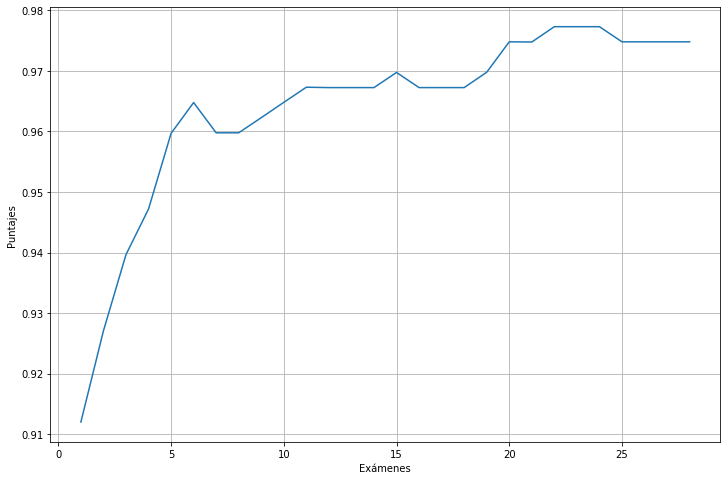

In [45]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.xlabel('Exámenes')
plt.ylabel('Puntajes')
plt.show

In [46]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfe = RFE(estimator= logistic, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)
rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)

'La tasa de acierto: 95.24%, La precisión: 95.24%, El valor f es: 95.24%, La exactitud es: 96.49%.'

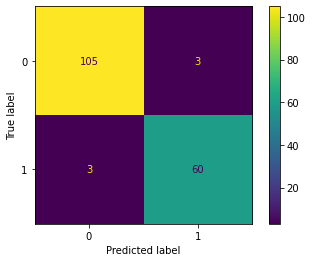

In [47]:
plot_confusion_matrix(logistic, rfe_test, y_test, values_format='d')

In [48]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False])

In [49]:
X3.columns[rfe.support_]

Index(['examen_25', 'examen_30'], dtype='object')

In [50]:
X5 = X3[['examen_25', 'examen_30']]
X5.head()

,examen_25,examen_30
0,2.001237,2.296076
1,1.890489,1.087084
2,1.456285,1.955000
3,-0.550021,2.175786
4,1.220724,0.729259


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


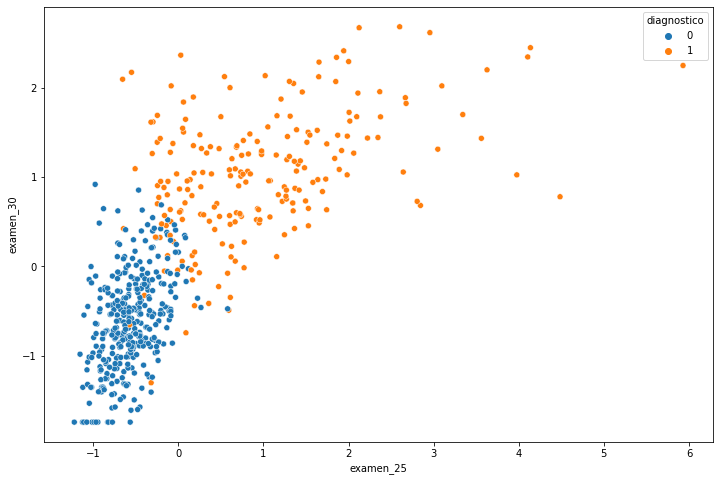

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(X5.iloc[:,0], X5.iloc[:,1], hue= dataset.diagnostico)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X6 = pca.fit_transform(X3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


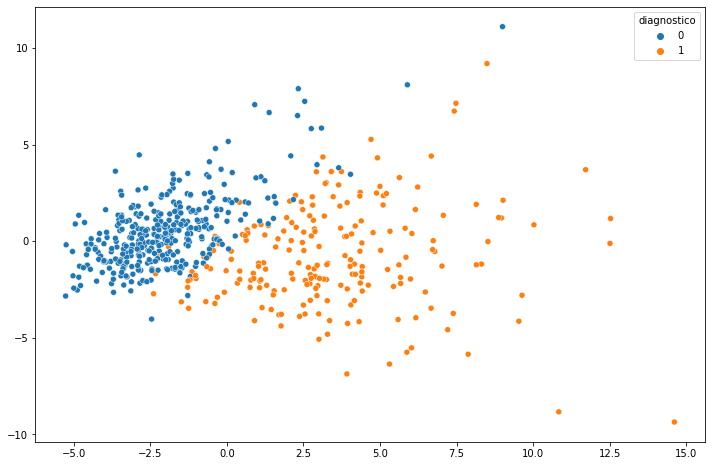

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(X6[:,0], X6[:,1], hue= dataset.diagnostico)

In [54]:
pca.explained_variance_ratio_.sum()

0.6094433796711519

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

X7 = tsne.fit_transform(X3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


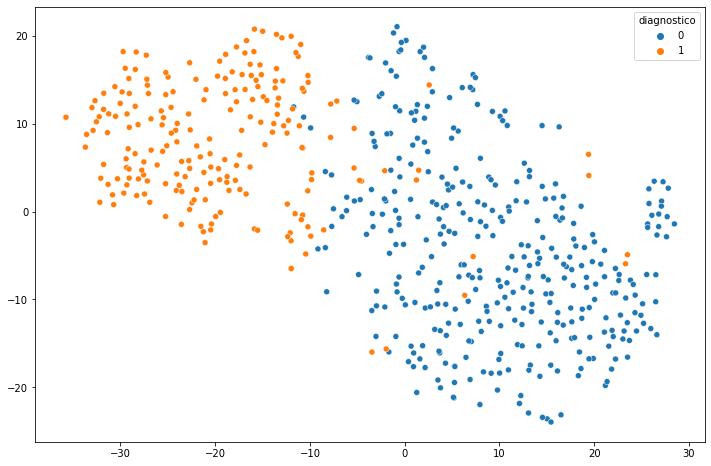

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(X7[:,0], X7[:,1], hue= dataset.diagnostico)